### Importando a base
- Base: 'BaseInadimplencia.xlsx'
    - Aba: 'teste'

In [1]:
# Importando o pandas e a base
import pandas as pd
base = pd.read_excel("BaseInadimplencia.xlsx",sheet_name='treino')

In [2]:
# Visualizando as 5 primeiras linhas
base.head()

,SaldoConta,SaldoInvestimento,Situacao
0,-1.365390,-3.280278,0
1,-3.910816,-0.874096,0
2,-2.745822,-2.250098,0
3,-1.352205,-1.280924,0
4,-0.596639,-2.932358,0


In [3]:
# Analisando as informações da nossa base
base.shape

(822, 3)

In [4]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SaldoConta         822 non-null    float64
 1   SaldoInvestimento  822 non-null    float64
 2   Situacao           822 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 19.4 KB


In [5]:
# Entendendo as informações estatísticas
base.describe()

,SaldoConta,SaldoInvestimento,Situacao
count,822.000000,822.000000,822.000000
mean,-0.247795,-0.132280,0.459854
std,2.833035,2.818233,0.498689
min,-5.849007,-6.078304,0.000000
25%,-2.769107,-2.630050,0.000000
50%,-0.813568,-0.864735,0.000000
75%,2.326787,2.538630,1.000000
max,6.231182,5.960512,1.000000


### Analisando a base importada
- Vamos criar um scatter plot com os dados importados
    - https://matplotlib.org/stable/plot_types/basic/scatter_plot.html#sphx-glr-plot-types-basic-scatter-plot-py

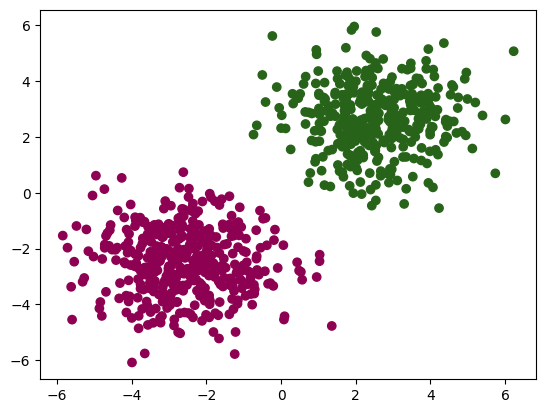

In [16]:
# Criando um scatter plot usando as informações da base e com as cores sendo a classificação do modelo
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.scatter(base.SaldoConta, base['SaldoInvestimento'],c=base.Situacao,cmap='PiYG')

plt.show()

### Criando o modelo usando uma reta que separe esses pontos
- Vamos criar uma reta como fizemos no projeto 3, capaz de separar esses dados

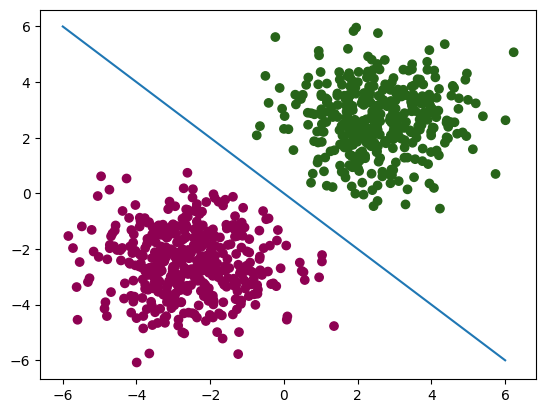

In [17]:
# Criando uma reta capaz de separar esses pontos
fig, ax = plt.subplots()

ax.scatter(base.SaldoConta, base['SaldoInvestimento'],c=base.Situacao,cmap='PiYG')
x = [6,-6]
y = [-6,6]
ax.plot(x, y)

plt.show()

### Criando uma função que consiga classificar os dados de treino
- Agora vamos criar uma função que seja capaz de classificar cada um dos pontos da base de treino

#### Transformando a reta criada acima em uma função
y_modelo = -x_modelo

Se y_modelo > y_dado -> class: 0 <br>
Se y_modelo < y_dado -> class: 1

In [8]:
base[base.Situacao == 1].head(1)

,SaldoConta,SaldoInvestimento,Situacao
444,1.999168,2.333924,1


In [9]:
Ponto: (1.99,2.33)
Modelo: (1.99,-1.99)

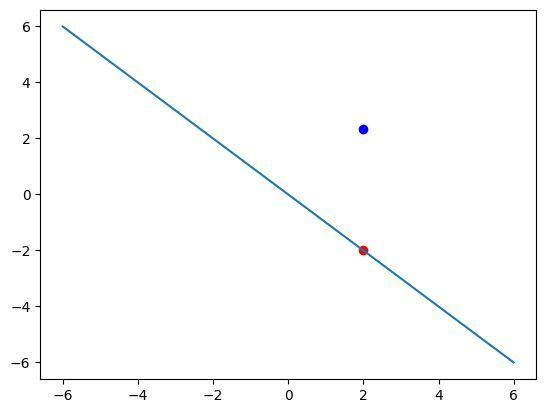

In [10]:
# Criando uma reta capaz de separar esses pontos
fig, ax = plt.subplots()

x = [6,-6]
y = [-6,6]
ax.plot(x, y)

# Ponto do dado que já temos
ax.scatter(1.99,2.33,c='b')

# Ponto gerado pelo modelo
ax.scatter(1.99,-1.99,c='r')

plt.show()

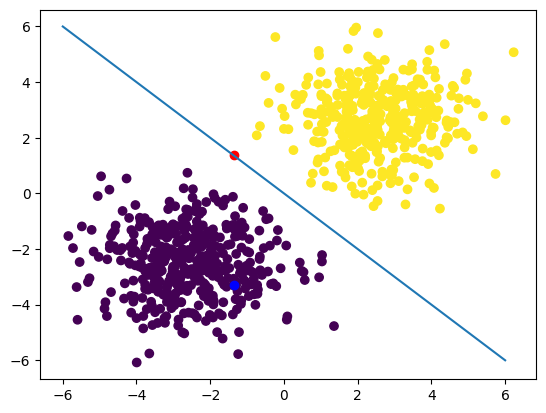

In [11]:
# Considerando agora todos os pontos que temos na base
import numpy as np
fig, ax = plt.subplots()

ax.scatter(base.SaldoConta, base['SaldoInvestimento'],c=base.Situacao)
x = [6,-6]
y = [-6,6]
ax.plot(x, y)

# Novo ponto que estou analisando
ax.scatter(-1.365390, -3.280278,c='b')

# Ponto no modelo que acabei de criar
ax.scatter(-1.365390, 1.365390,c='r')

plt.show()

In [12]:
# Criar uma função que classifique esses pontos
def clf(x,y):
    # y_modelo = -x_modelo
    y_modelo = -x

    # Se y_modelo > y_dado -> class: 0
    if y_modelo >= y:
        return 0
    # Se y_modelo < y_dado -> class: 1
    elif y_modelo < y:
        return 1

In [13]:
# Verificando a base
base.head(2)

,SaldoConta,SaldoInvestimento,Situacao
0,-1.365390,-3.280278,0
1,-3.910816,-0.874096,0


In [14]:
# Aplicando a função aos dados de treino
base['predict'] = base.apply(lambda x:clf(x['SaldoConta'],x['SaldoInvestimento']),axis=1)

In [15]:
# Verificando a base com a nova coluna
base.head(2)

,SaldoConta,SaldoInvestimento,Situacao,predict
0,-1.365390,-3.280278,0,0
1,-3.910816,-0.874096,0,0
